<a href="https://colab.research.google.com/github/Quylongtqt/04_Machine-learning/blob/main/BreastCancerDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import numpy as np
import glob
import random
import warnings
warnings.filterwarnings(action = 'ignore')
import matplotlib.pyplot as plt

from PIL import Image

random.seed(98)
np.random.seed(98)

In [4]:
breast_img = glob.glob('/content/drive/MyDrive/breast-histopathology-images/**/*.png', recursive = True)

for imgname in breast_img[:1]:
    print(imgname)

/content/drive/MyDrive/breast-histopathology-images/16568/0/16568_idx5_x1201_y1151_class0.png


In [5]:
neg_img = []
pos_img = []

for img in breast_img:
    if img[-5] == '0' :
        neg_img.append(img)
    
    elif img[-5] == '1' :
        pos_img.append(img)

In [6]:
neg_num = len(neg_img)
pos_num = len(pos_img)
        
total_img_num = neg_num + pos_num
        
print('Number of Images in IDC (-): {}' .format(neg_num))
print('Number of Images in IDC (+): {}' .format(pos_num))
print('Total Number of Images : {}' .format(total_img_num))

Number of Images in IDC (-): 12661
Number of Images in IDC (+): 2760
Total Number of Images : 15421


Visualization data set

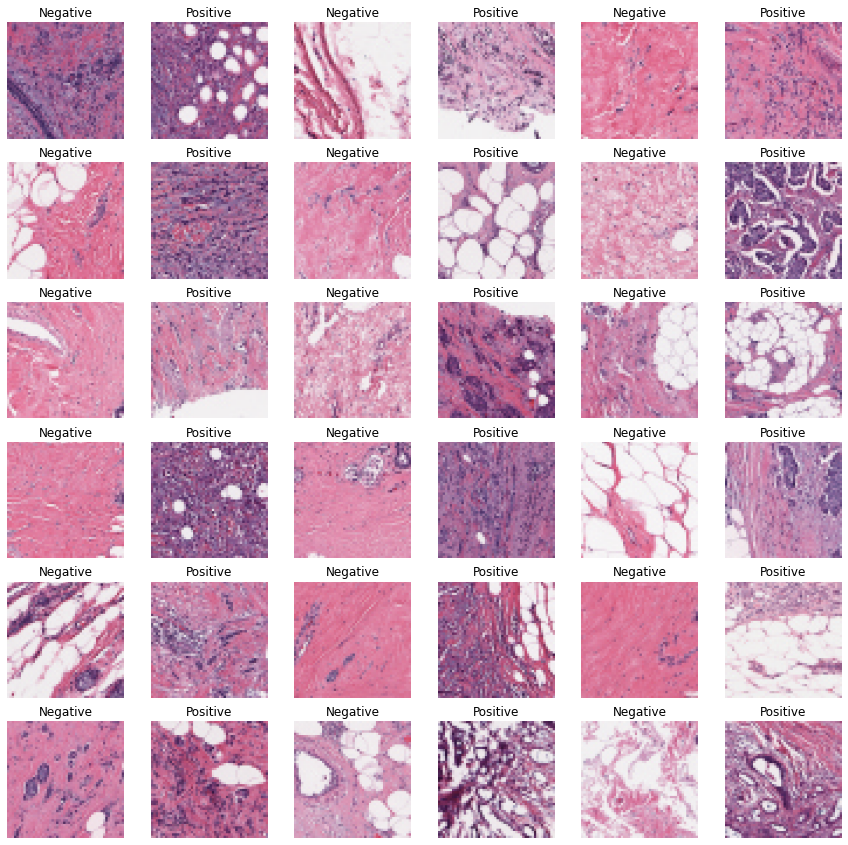

In [7]:
from keras.preprocessing import image

plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(neg_img), 18)
some_can = np.random.randint(0, len(pos_img), 18)

s = 0
for num in some_non:
    
        img = image.load_img((neg_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('Negative')
        plt.imshow(img.astype('uint8'))
        s += 1
        
s = 1
for num in some_can:
    
        img = image.load_img((pos_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('Positive')
        plt.imshow(img.astype('uint8'))
        s += 1

# split dataset to train, validation, test

In [8]:
from matplotlib.image import imread
import cv2

neg_img = random.sample(neg_img, len(neg_img))
pos_img = random.sample(pos_img, len(pos_img))

neg_img_arr = []
pos_img_arr = []

for img in neg_img:
        
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    neg_img_arr.append([n_img_size, 0])
    
for img in pos_img:
    
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    pos_img_arr.append([c_img_size, 1])

In [9]:
X = []
y = []

breast_img_arr = np.concatenate((neg_img_arr, pos_img_arr))
random.shuffle(breast_img_arr)

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)
    
X = np.array(X)
y = np.array(y)

print('Total image : {}' .format(X.shape))

Total image : (15421, 50, 50, 3)


In [33]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_trainT, X_test, y_trainT, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7, stratify = y)

X_train, X_valid, y_train, y_valid = train_test_split(X_trainT, y_trainT, test_size = 0.3, random_state = 7, stratify = y_trainT)

y_train = to_categorical(y_train, 2)
y_valid = to_categorical(y_valid, 2)
y_test = to_categorical(y_test, 2)

print('X_train shape : {}' .format(X_train.shape))
print('X_valid shape : {}' .format(X_valid.shape))
print('X_test shape : {}' .format(X_test.shape))

print('y_train shape : {}' .format(y_train.shape))
print('y_valid shape : {}' .format(y_valid.shape))
print('y_test shape : {}' .format(y_test.shape))

X_train shape : (7555, 50, 50, 3)
X_valid shape : (3239, 50, 50, 3)
X_test shape : (4627, 50, 50, 3)
y_train shape : (7555, 2)
y_valid shape : (3239, 2)
y_test shape : (4627, 2)


# building a CNN model

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model1 = Sequential()

model1.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(0.25))

model1.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(0.25))

model1.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(128, activation = 'relu'))

model1.add(Dropout(0.5))
model1.add(Dense(2, activation = 'sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0

# compiling the model

In [15]:
from tensorflow.keras.optimizers import Adam

Adam = Adam(learning_rate = 0.0001)
model1.compile(loss = 'binary_crossentropy', optimizer = Adam, metrics = ['accuracy'])
history = model1.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 10, batch_size = 50)

Epoch 1/10
223/223 [==============================] - 83s 367ms/step - loss: 1.5183 - accuracy: 0.9767 - val_loss: 0.0796 - val_accuracy: 0.9832
Epoch 2/10
223/223 [==============================] - 82s 367ms/step - loss: 0.2243 - accuracy: 0.9785 - val_loss: 0.1547 - val_accuracy: 0.9832
Epoch 3/10
223/223 [==============================] - 81s 365ms/step - loss: 0.1423 - accuracy: 0.9794 - val_loss: 0.3009 - val_accuracy: 0.9832
Epoch 4/10
223/223 [==============================] - 81s 361ms/step - loss: 0.1258 - accuracy: 0.9817 - val_loss: 0.3724 - val_accuracy: 0.9832
Epoch 5/10
223/223 [==============================] - 81s 363ms/step - loss: 0.1176 - accuracy: 0.9825 - val_loss: 0.3156 - val_accuracy: 0.9832
Epoch 6/10
223/223 [==============================] - 80s 361ms/step - loss: 0.1044 - accuracy: 0.9824 - val_loss: 0.3117 - val_accuracy: 0.9832
Epoch 7/10
223/223 [==============================] - 81s 365ms/step - loss: 0.1044 - accuracy: 0.9827 - val_loss: 0.3418 - val_ac

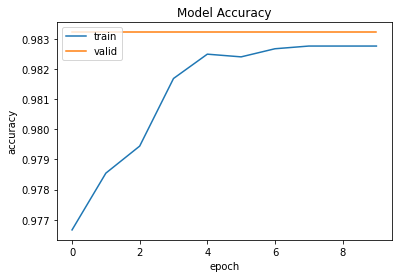

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [17]:
result = model1.evaluate(X_valid, y_valid, batch_size = 50)
print('Test Loss, Test Accuracy :', result)

40/40 [==============================] - 3s 85ms/step - loss: 0.1663 - accuracy: 0.9832
Test Loss, Test Accuracy : [0.1663355529308319, 0.9832231998443604]


#Visualization

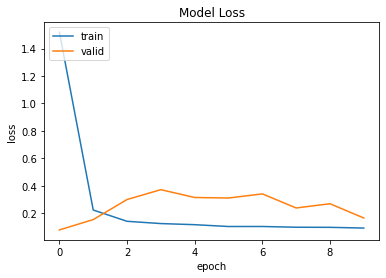

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

#Testing model

In [19]:
P = model1.predict(X_test)

true = 0
PP = 0
PN = 0
NP = 0
NN = 0

for i in range(X_test.shape[0]):
    print('True : {}'.format(np.argmax(y_test[i])))
    print('Predict : {}'.format(np.argmax(P[i])))
    if(np.argmax(P[i]) == np.argmax(y_test[i])):
        true = true + 1
    if((np.argmax(P[i]) == 1) & (np.argmax(y_test[i]) == 1)):
        PP = PP + 1
    if((np.argmax(P[i]) == 0) & (np.argmax(y_test[i]) == 1)):
        PN = PN + 1
    if((np.argmax(P[i]) == 1) & (np.argmax(y_test[i]) == 0)):
        NP = NP + 1
    if((np.argmax(P[i]) == 0) & (np.argmax(y_test[i]) == 0)):
        NN = NN + 1

print('Total images : {}' .format(X_test.shape))
print('True Predict : {}'.format(true))
print('PP : {}'.format(PP))
print('PN : {}'.format(PN))
print('NP : {}'.format(NP))
print('NN : {}'.format(NN))
pre_accuracy = 100 * float(true/X_test.shape[0])        
print('Predict Accuracy: {}' .format(pre_accuracy))

True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Predict : 0
True : 0
Pred

# Visualization

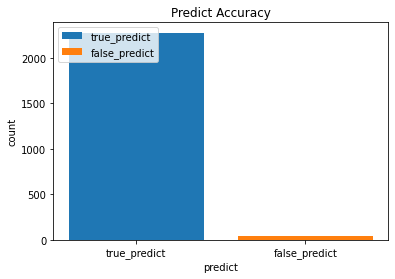

In [20]:
import seaborn as sns
false = len(X_test) - true

predict = [true, false]
label = ['true_predict', 'false_predict']

plt.bar(label[0], predict[0])
plt.bar(label[1], predict[1])
plt.title('Predict Accuracy')
plt.xlabel('predict')
plt.ylabel('count')
plt.legend(['true_predict', 'false_predict'], loc='upper left')
plt.show()

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization

model2 = Sequential()
model2.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (50,50,3)))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Flatten())
model2.add(Dense(units = 128 , activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units = 2 , activation = 'softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 batch_normalization_5 (Batc  (None, 50, 50, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 25, 25, 64)        18496     
                                                                 
 dropout_9 (Dropout)         (None, 25, 25, 64)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 25, 25, 64)      

In [40]:
from tensorflow.keras.optimizers import Adam

Adam = Adam(learning_rate = 0.0001)
model2.compile(loss = 'binary_crossentropy', optimizer = Adam, metrics = ['accuracy'])
history2 = model2.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 50, batch_size = 50)

Epoch 1/30
152/152 [==============================] - 69s 449ms/step - loss: 0.0064 - accuracy: 0.9977 - val_loss: 0.0898 - val_accuracy: 0.9858
Epoch 2/30
152/152 [==============================] - 69s 453ms/step - loss: 0.0073 - accuracy: 0.9974 - val_loss: 0.0787 - val_accuracy: 0.9824
Epoch 3/30
152/152 [==============================] - 68s 450ms/step - loss: 0.0087 - accuracy: 0.9974 - val_loss: 0.0807 - val_accuracy: 0.9852
Epoch 4/30
152/152 [==============================] - 68s 449ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.0758 - val_accuracy: 0.9855
Epoch 5/30
152/152 [==============================] - 68s 449ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0853 - val_accuracy: 0.9843
Epoch 6/30
152/152 [==============================] - 68s 449ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0815 - val_accuracy: 0.9784
Epoch 7/30
152/152 [==============================] - 68s 450ms/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.1012 - val_ac

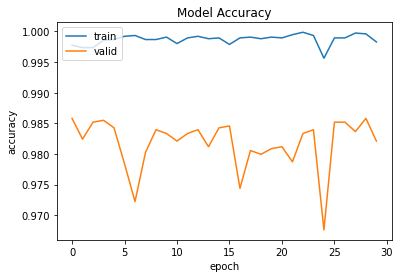

In [45]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [46]:
result = model2.evaluate(X_valid, y_valid, batch_size = 50)
print('Test Loss, Test Accuracy :', result)

65/65 [==============================] - 6s 91ms/step - loss: 0.1064 - accuracy: 0.9821
Test Loss, Test Accuracy : [0.1063813865184784, 0.9820932149887085]


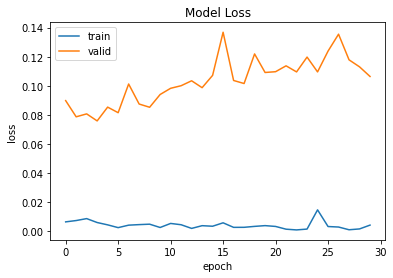

In [47]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [51]:
P2 = model2.predict(X_test)

true = 0
PP = 0
PN = 0
NP = 0
NN = 0

for i in range(X_test.shape[0]):
    if(np.argmax(P2[i]) == np.argmax(y_test[i])):
        true = true + 1
    if((np.argmax(P2[i]) == 1) & (np.argmax(y_test[i]) == 1)):
        PP = PP + 1
    if((np.argmax(P2[i]) == 0) & (np.argmax(y_test[i]) == 1)):
        PN = PN + 1
    if((np.argmax(P2[i]) == 1) & (np.argmax(y_test[i]) == 0)):
        NP = NP + 1
    if((np.argmax(P2[i]) == 0) & (np.argmax(y_test[i]) == 0)):
        NN = NN + 1

print('Total images : {}' .format(X_test.shape))
print('True Predict : {}'.format(true))
print('PN : {}'.format(PP))
print('PP : {}'.format(PN))
print('NP : {}'.format(NP))
print('NN : {}'.format(NN))
pre_accuracy = 100 * float(true/X_test.shape[0])        
print('Predict Accuracy: {}' .format(pre_accuracy))

Total images : (4627, 50, 50, 3)
True Predict : 4531
PN : 23
PP : 56
NP : 40
NN : 4508
Predict Accuracy: 97.92522152582667
